# Decision Trees

Experiment freely. This is a hands-on (brains off!) experience!

In [1]:
source('src/lib.R')

In [2]:
df = get_partitioned_df()
info = getModelInfo()
data_name = 'spirals'

___

One of the most renowned DT algorithms is called ID3: Iterative Dichotomizer. All others are pretty similar. 

In a nutshell, ID3 repeatedly partitions (alias: *slice*) the data across the features in an attempt to discriminate the classes. The partitioning is performed based on an Information Gain $IG$ principle, a criterion based on a measure of entropy $H$ in the dataset or in its partitions $S$.
The partitioning recursively happens for every branch until
* the information gain from a further partitioning is too low;
* all the instances $x$ in a partition belongs to the same class $Y$;
* a pre-defined number of iteration is reached.

Notably:

* Entropy: $H(S) = \sum_{x \in Y} -p(y) \log_{2}p(y)$

* Information Gain: $IG(A,S) = H(S) - \sum_{t \in T} p(t)H(t)$

Where:
* $H(S)$ – is the entropy of set $S$
* $T$ – The subsets created from splitting set $S$ by attribute $A$ such that $S = \bigcup_{t \in T} t$
*$p(t)$ – The proportion of the number of elements in $t$ to the number of elements in set $S$
* $H(t)$ – Entropy of subset $t$

___

In [3]:
## choose the algorithm

algorithm = 'rpart2'

info[[algorithm]]$parameters

parameter,class,label
maxdepth,numeric,Max Tree Depth


In [4]:
## set the hyperparameters

maxdepth = 1

hyperparameters = data.frame('maxdepth' = maxdepth)

In [5]:
model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot')
           )

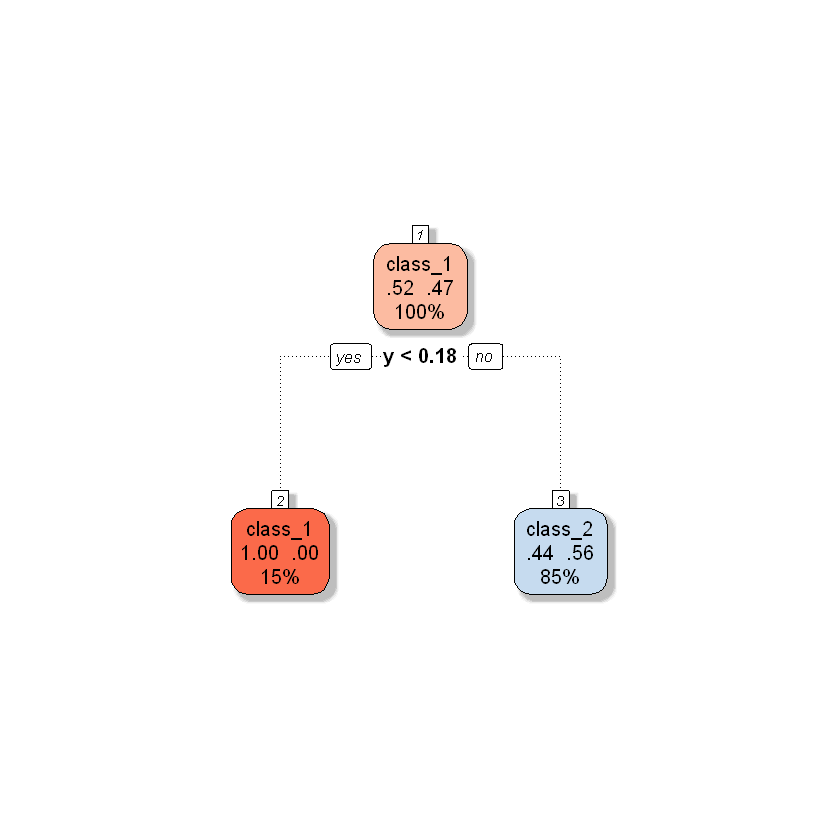

In [6]:
## plot splitting iterations

fancyRpartPlot(model$finalModel, palettes = c('Reds', 'Blues'), sub = "")

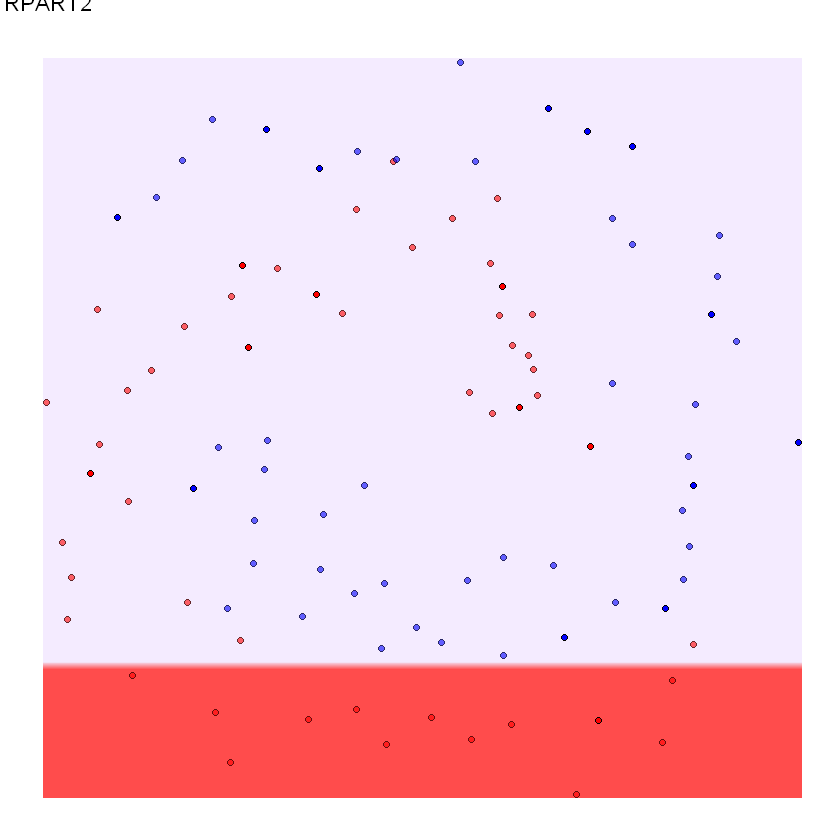

In [7]:
plot_model(df, data_name, model)

___

### Tweak DT Hyperparameters

In [8]:
## set the hyperparameters

maxdepth = seq_len(10)

hyperparameters = data.frame('maxdepth' = maxdepth)

In [9]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot')
           )

We cannot really set the exact value of the tree length, which is indeed determined by
* the information gain
* the residual entropy

therefore, the ML algorithm iteratively tries different solutions and selects the best one. What does *the best one* mean? Food for thought, for next session!

In [10]:
#plot(model)

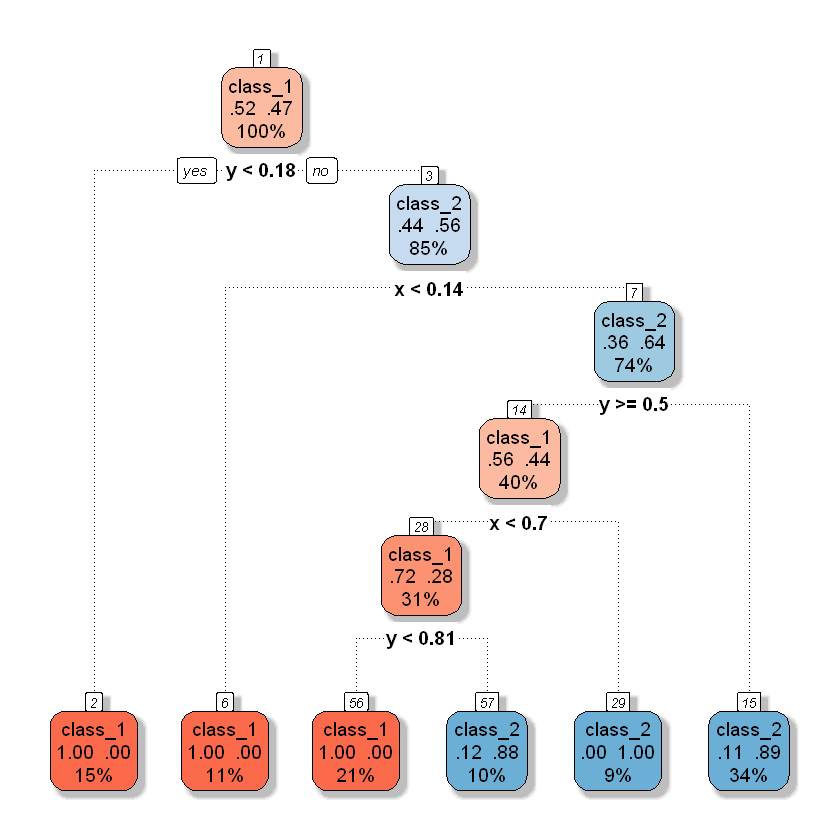

In [11]:
## plot splitting iterations

fancyRpartPlot(model$finalModel, palettes = c('Reds', 'Blues'), sub = "")

This looks neat!

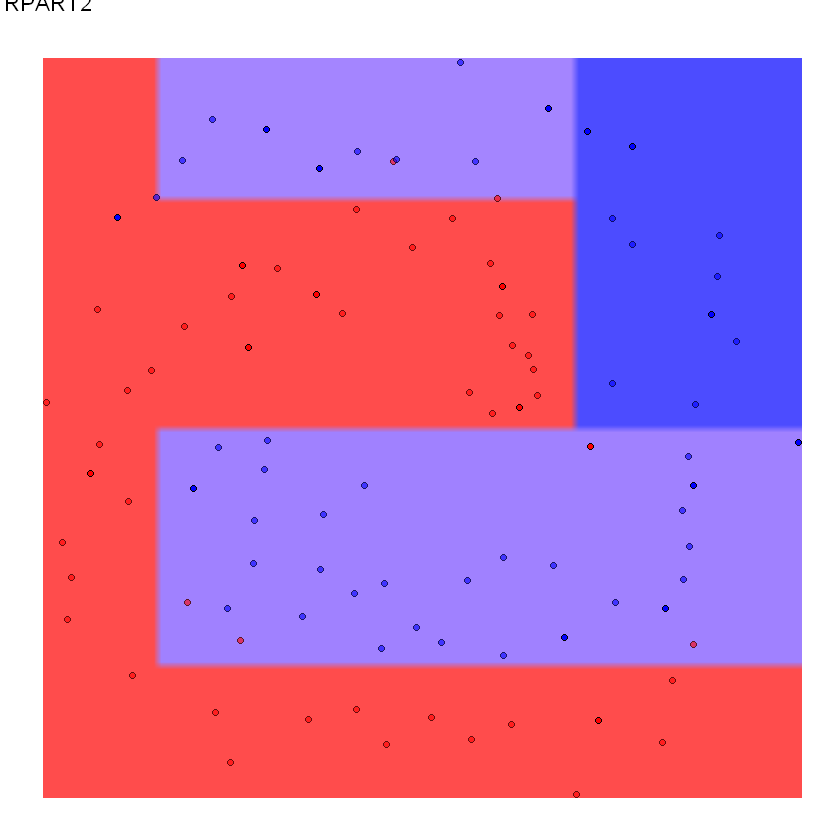

In [12]:
plot_model(df, data_name, model)

___
# Random Forests

They are a quite natural extension of decision trees. They aim in solving some overfitting problem of classic decision trees.

Basically a RF is the average prediction a bunch of DTs fitted on random subsample of the dataset. In our case it is not too much of a problem, as we just have two features, but in a more complex setting this approach can really make the difference.

In [13]:
## choose the algorithm

algorithm = 'rf'
  
info[[algorithm]]$parameters
  
## set the hyperparameter

mtry = 1
  
hyperparameters = data.frame('mtry' = mtry)

parameter,class,label
mtry,numeric,#Randomly Selected Predictors


In [14]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
                x = df[[data_name]]$x_train,
                method = algorithm,
                tuneGrid = hyperparameters,
                trControl = trainControl(method = 'boot')
  )

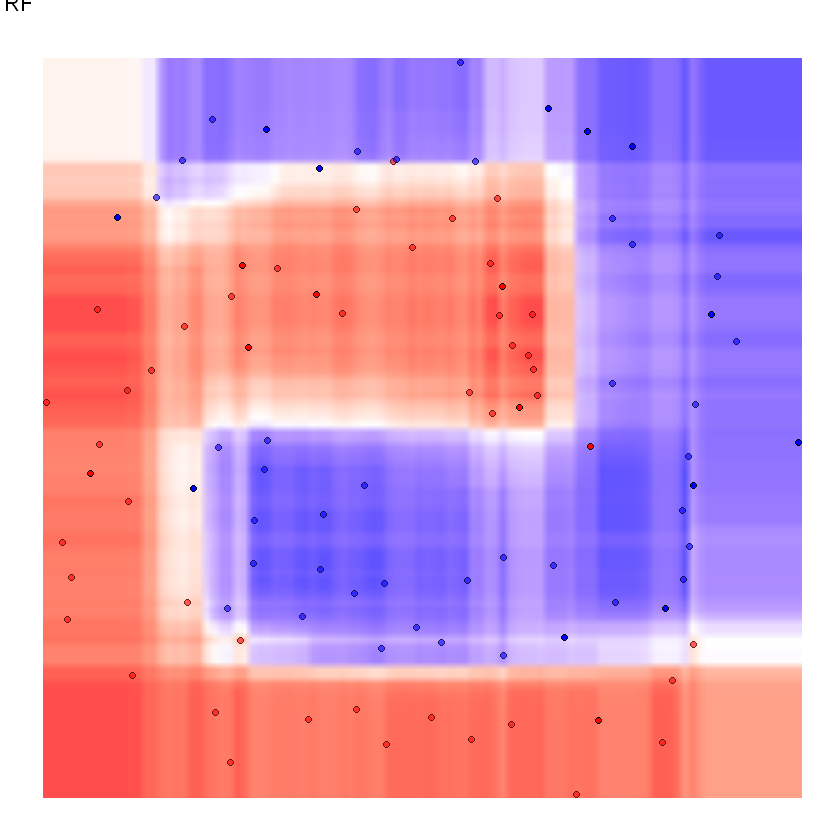

In [15]:
plot_model(df, data_name, model)